In [28]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Conectar a la base de datos y cargar los datos
conn = sqlite3.connect("../../db/proyectomacro.db")
df = pd.read_sql("SELECT * FROM balanza_comercial", conn)
df.set_index('año',inplace=True)
conn.close()
output_dir = "../../assets/imagenes/7.balanza_comercial/"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
df

,exportaciones,importaciones,saldo_comercial
año,,,
1949,102.970,78.330,24.640
1950,94.072,55.842,38.230
1951,150.590,85.837,64.753
1952,141.303,92.620,48.683
1953,112.663,68.006,44.657
...,...,...,...
2020,7092.600,6955.300,137.300
2021,11259.500,9120.800,2138.700
2022,13924.200,11895.800,2028.400


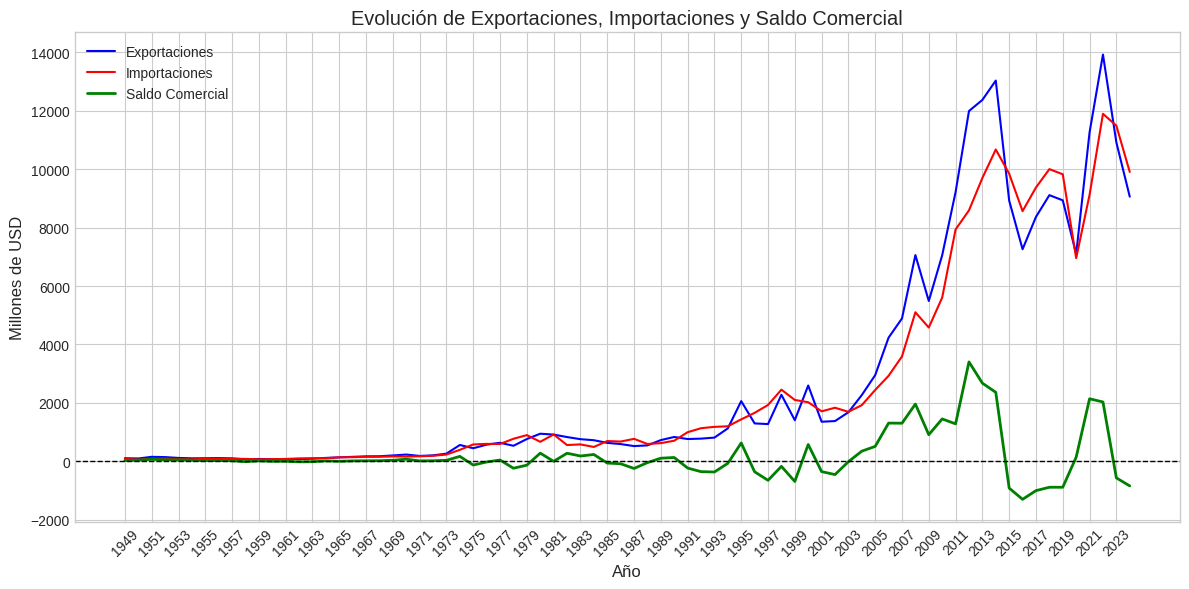

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

In [29]:
# Suponiendo que df ya está cargado y contiene las columnas:
# 'año', 'exportaciones', 'importaciones', 'saldo_comercial'
df = df.sort_values('año')
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(12,6))
plt.plot(df.index, df['exportaciones'], label='Exportaciones', color='blue')
plt.plot(df.index, df['importaciones'], label='Importaciones', color='red')
plt.plot(df.index, df['saldo_comercial'], label='Saldo Comercial', color='green', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=1)

plt.title("Evolución de Exportaciones, Importaciones y Saldo Comercial")
plt.xlabel("Año")
plt.ylabel("Millones de USD")
plt.legend()
plt.grid(True)
plt.xticks(df.index[::2],rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "7.1_balanza_comercial.png"))
plt.show()
plt.close


/tmp/ipykernel_23673/901472202.py:35: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/home/navi/Desktop/archivos/DS/aider/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


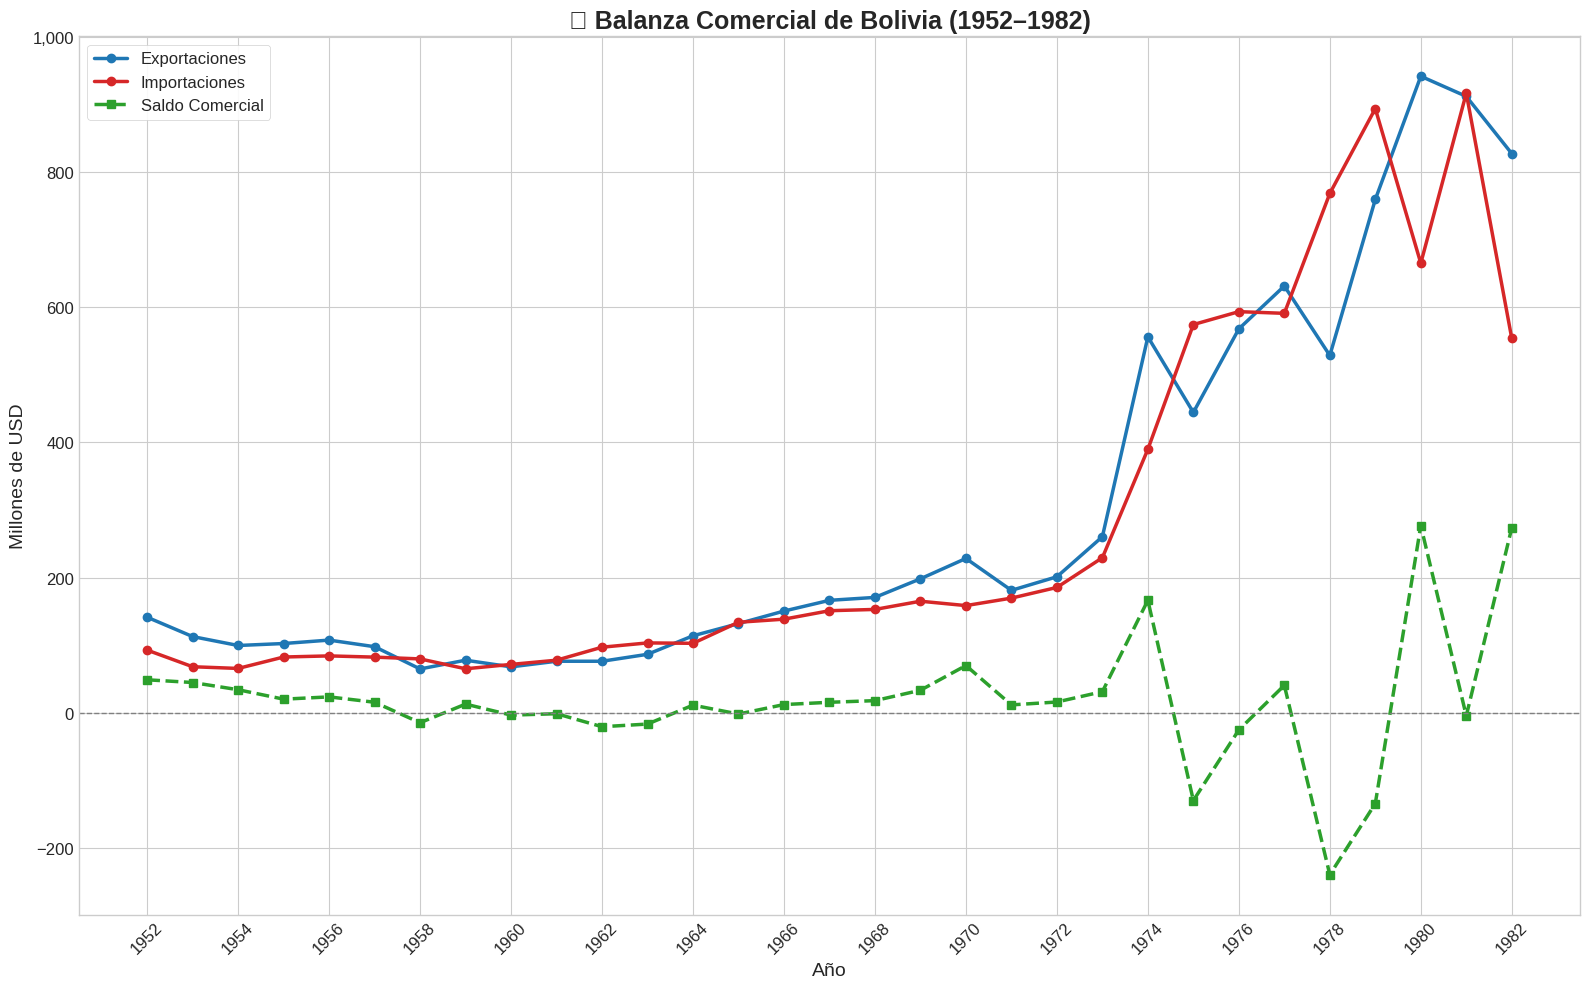

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Subconjunto del DataFrame para el periodo 1952-1982
df_p1 = df[(df.index >= 1952) & (df.index <= 1982)]

# Usar un estilo de Matplotlib que ofrezca buena estética
plt.style.use("seaborn-v0_8-whitegrid")

# Crear figura con mayor altura
plt.figure(figsize=(16, 10))

# Graficar cada serie con marcadores y ancho de línea personalizado
plt.plot(df_p1.index, df_p1['exportaciones'], label='Exportaciones', linewidth=2.5, color='#1f77b4', marker='o')
plt.plot(df_p1.index, df_p1['importaciones'], label='Importaciones', linewidth=2.5, color='#d62728', marker='o')
plt.plot(df_p1.index, df_p1['saldo_comercial'], label='Saldo Comercial', linewidth=2.5, color='#2ca02c', linestyle='--', marker='s')

# Línea horizontal en cero
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Títulos y etiquetas con mayor tamaño de fuente
plt.title("📉 Balanza Comercial de Bolivia (1952–1982)", fontsize=18, weight='bold')
plt.xlabel("Año", fontsize=14)
plt.ylabel("Millones de USD", fontsize=14)

# Personalizar ticks del eje x e y
plt.xticks(df_p1.index[::2], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))  # separadores de miles

# Leyenda con borde y fondo semi-transparente
plt.legend(frameon=True, framealpha=0.9, fontsize=12, loc='upper left')

# Ajustar layout; si necesitas más espacio para las etiquetas, podés usar subplots_adjust
plt.tight_layout()

# Mostrar y cerrar la figura
plt.show()
plt.close()


/tmp/ipykernel_23673/4239640355.py:23: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_23673/4239640355.py:24: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  plt.savefig(os.path.join(output_dir, "7.2_balanza_comercial_1982_2006.png"))


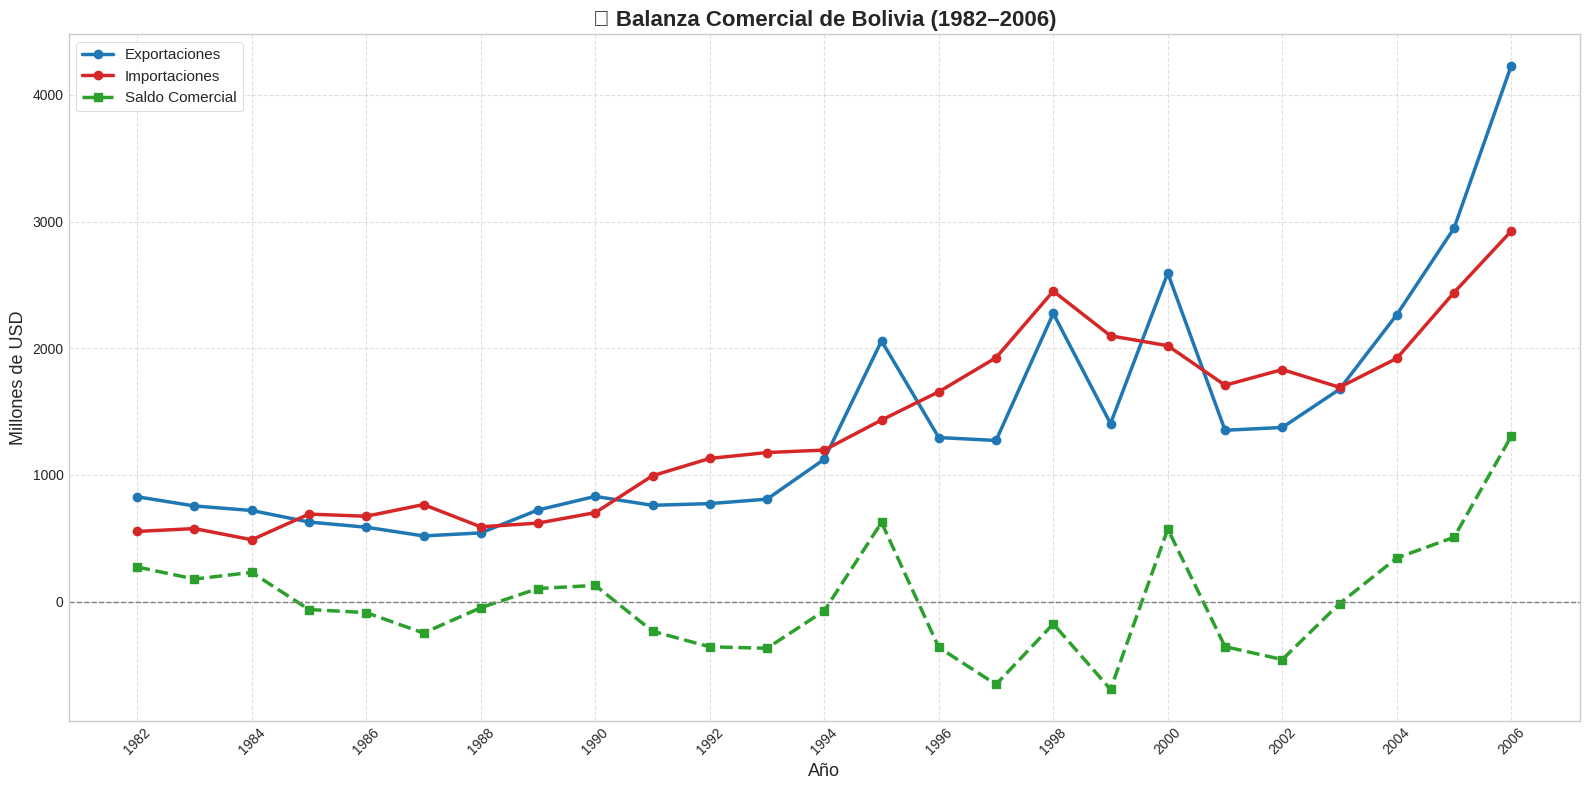

In [31]:

# Colores personalizados
colors = {
    "exportaciones": "#1f77b4",  # azul
    "importaciones": "#d62728",  # rojo
    "saldo_comercial": "#2ca02c"  # verde
}

# Gráfico para 1982–2006
df_p2 = df[(df.index >= 1982) & (df.index <= 2006)]

plt.figure(figsize=(16, 8))
plt.plot(df_p2.index, df_p2['exportaciones'], label='Exportaciones', color=colors["exportaciones"], linewidth=2.5, marker='o')
plt.plot(df_p2.index, df_p2['importaciones'], label='Importaciones', color=colors["importaciones"], linewidth=2.5, marker='o')
plt.plot(df_p2.index, df_p2['saldo_comercial'], label='Saldo Comercial', color=colors["saldo_comercial"], linewidth=2.5, linestyle='--', marker='s')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("📉 Balanza Comercial de Bolivia (1982–2006)", fontsize=16, weight='bold')
plt.xlabel("Año", fontsize=13)
plt.ylabel("Millones de USD", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True, framealpha=0.9, fontsize=11, loc='upper left')
plt.xticks(df_p2.index[::2], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "7.2_balanza_comercial_1982_2006.png"))
plt.show()
plt.close()

/tmp/ipykernel_23673/3974961801.py:16: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipykernel_23673/3974961801.py:17: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) Liberation Sans.
  plt.savefig(os.path.join(output_dir, "7.3_balanza_comercial_2006_presente.png"))


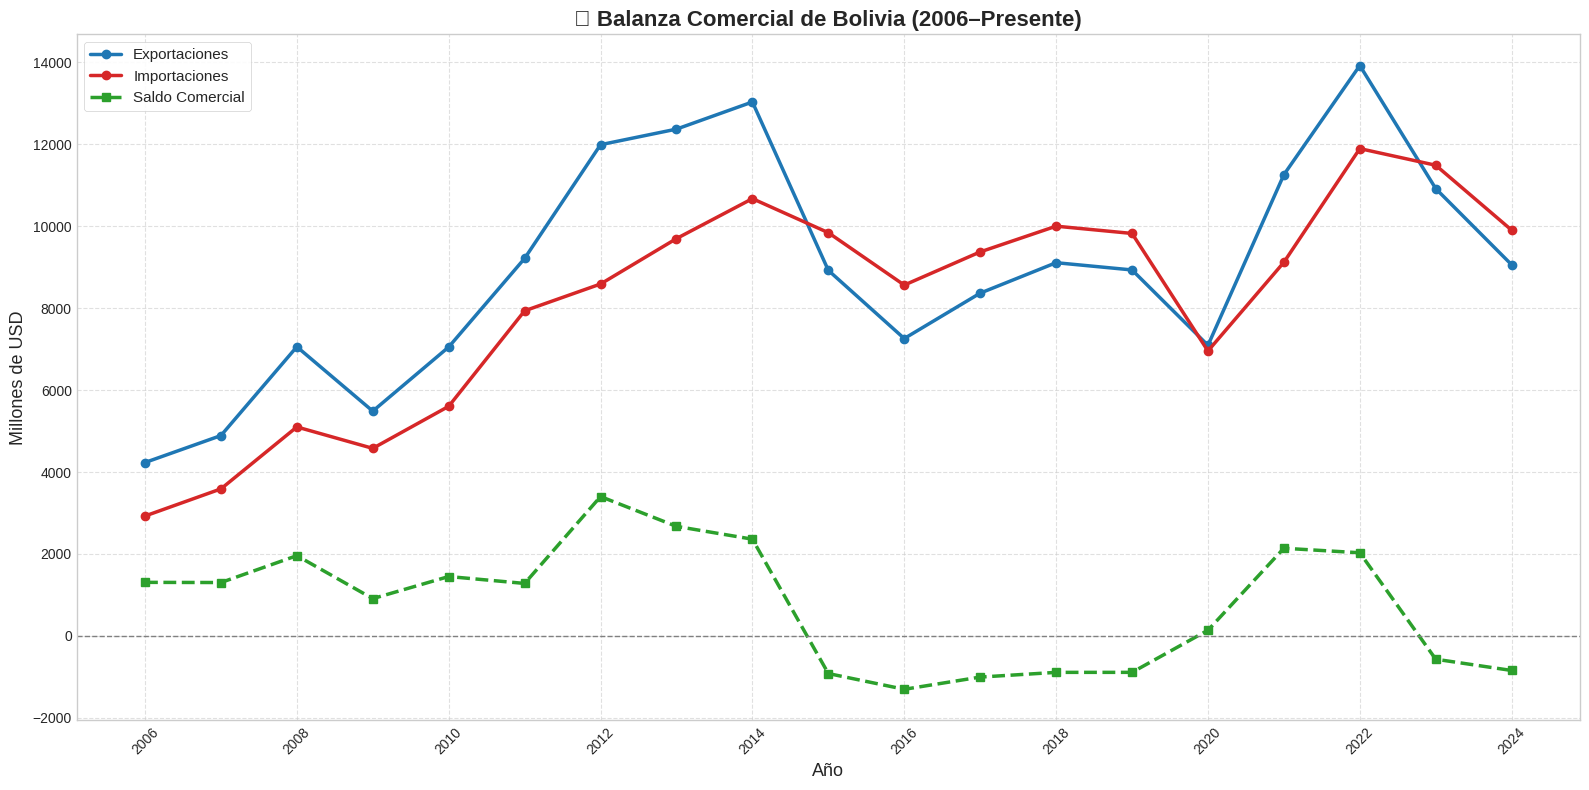

In [32]:
# Gráfico para 2006–presente
df_p3 = df[df.index >= 2006]

plt.figure(figsize=(16, 8))
plt.plot(df_p3.index, df_p3['exportaciones'], label='Exportaciones', color=colors["exportaciones"], linewidth=2.5, marker='o')
plt.plot(df_p3.index, df_p3['importaciones'], label='Importaciones', color=colors["importaciones"], linewidth=2.5, marker='o')
plt.plot(df_p3.index, df_p3['saldo_comercial'], label='Saldo Comercial', color=colors["saldo_comercial"], linewidth=2.5, linestyle='--', marker='s')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title("📉 Balanza Comercial de Bolivia (2006–Presente)", fontsize=16, weight='bold')
plt.xlabel("Año", fontsize=13)
plt.ylabel("Millones de USD", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(frameon=True, framealpha=0.9, fontsize=11, loc='upper left')
plt.xticks(df_p3.index[::2], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "7.3_balanza_comercial_2006_presente.png"))
plt.show()
plt.close()